In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
#Import the data
df = pd.read_csv("ex2data1.txt")
df.columns = ['Marks 1', 'Marks 2', 'Accepted']

In [205]:
df

,Marks 1,Marks 2,Accepted
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


In [206]:
#Numpy arrays
X = df[['Marks 1', "Marks 2"]].values
ones = np.ones(X.shape[0])
X = np.c_[ones, X]
y = df['Accepted'].values

In [207]:
#Scaling the data minmax
X_scaled = np.zeros(X.shape)
X_scaled[:,0] = X[:,0]
X_scaled[:,1] = X[:,1]/np.max(X[:,1])
X_scaled[:,2] = X[:,2]/np.max(X[:,2])

In [208]:
#The sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [209]:
sigmoid(0)

0.5

In [210]:
def hypothesis(theta, X):
    return sigmoid(np.dot(X, theta))

In [211]:
def cost_function(X, y, theta):
    m = len(y)
    h = hypothesis(theta, X)
    J = (-1/m)*(np.sum(y*np.log(h)+(1-y)*np.log(1-h)))
    return J

In [212]:
theta = np.zeros(3)
cost_function(X_scaled, y, theta)

0.6931471805599454

In [185]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)
    for i in range(iterations):
        h = hypothesis(theta, X)
        theta = theta - alpha * (1/m) * (h-y).dot(X)
        J_history[i] = cost_function(X, y, theta)
    return theta, J_history

In [194]:
theta = np.zeros(3)
theta, J_history = gradient_descent(X_scaled, y, theta, 0.3, 10000)

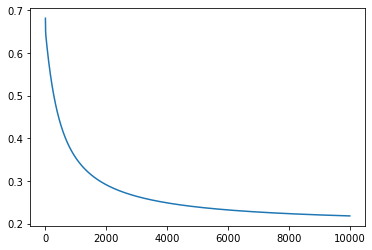

In [195]:
plt.plot(J_history)

In [196]:
theta

array([-16.83157322,  13.85599763,  13.33646879])

In [197]:
predictions = hypothesis(theta, X_scaled)
preds = np.zeros(len(predictions))
for i in range(len(predictions)):
    if predictions[i] <0.5:
        preds[i] = 0
    else:
        preds[i] = 1

In [198]:
sum(np.abs(preds-y))/len(y)

0.1111111111111111

In [199]:
t = np.arange(0, 100, 0.1)
def boundary(x,y):
    return theta[0] + theta[1]*x + theta[2]*y

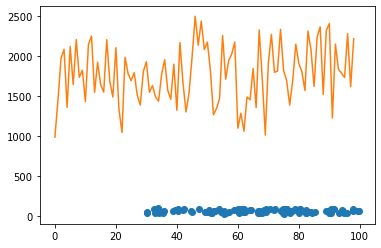

In [201]:
x = X[:,1]
y_ = X[:,2]
plt.plot(x, y, 'o')
plt.plot(boundary(x,y))

In [213]:
y

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [216]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled, y)
consts = model.coef_

In [221]:
consts[0][0]

8.406346720827336e-07

In [222]:
def boundary(x,y):
    return consts[0][0] + consts[0][1]*x + consts[0][2]*y

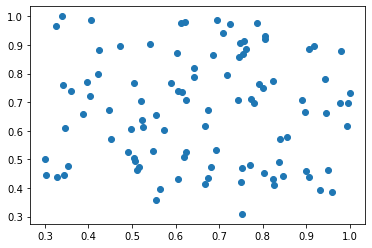

In [225]:
x = X_scaled[:,1]
y_ = X_scaled[:,2]
plt.plot(x, y_, 'o')
# plt.plot(boundary(x,y_))

In [226]:
consts

array([[8.40634672e-07, 2.93977699e+00, 2.73028917e+00]])

In [233]:
sum(model.predict(X_scaled)-y)/len(y)

0.09090909090909091